In [91]:
# Em resumo, o script realiza a análise de clusters no conjunto de dados Iris, 
# utilizando o método KMeans para agrupar as flores em diferentes clusters com base em suas medidas de sépala e pétala, 
# e em seguida, visualiza os clusters em gráficos 2D e 3D usando o PCA para redução de dimensionalidade.

In [22]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [40]:
# Carrega os dados com Pandas: a base escolhida é um CSV que traz medidas de pétalas e sépalas da flor Íris.
dataset = pd.read_csv("datasets/kmeans.csv")
dataset.head(10)
rows, cols = dataset.shape
print(f'O DataFrame possui {rows} linhas e {cols} colunas.')
dataset.head(5)

O DataFrame possui 150 linhas e 4 colunas.


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
# Padronização dos dados com o StandardScaler do scikit-learn.
scaler = StandardScaler()

dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler.fit_transform(
    dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
)
dataset.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


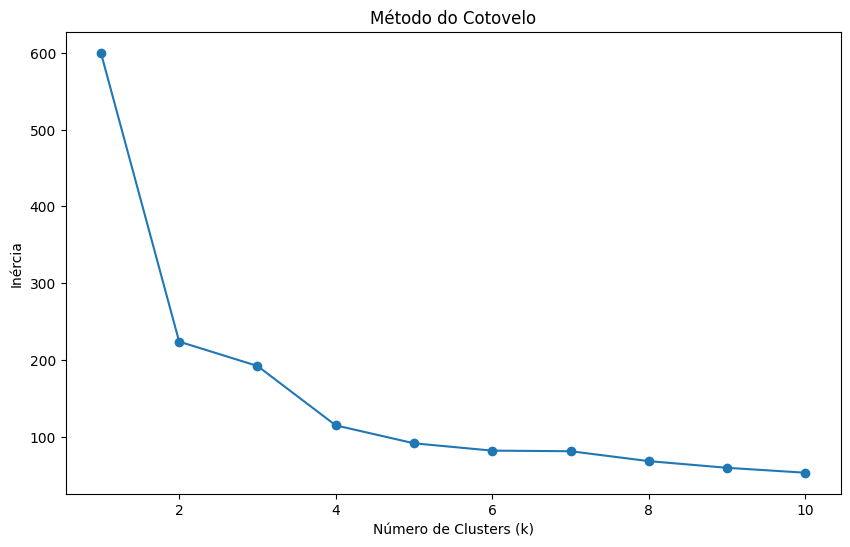

In [42]:
# Determinação do número de clusters através do método do cotovelo
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataset)
    inertia.append(kmeans.inertia_)

# Plota a inércia em relação ao número de clusters
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [43]:
# Aplicação do KMeans
model = KMeans(n_clusters= 3)
model.fit(dataset)
group = model.predict(dataset)
dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
5,-0.537178,1.957669,-1.170675,-1.050031
6,-1.506521,0.800654,-1.341272,-1.181504
7,-1.021849,0.800654,-1.284407,-1.312977
8,-1.748856,-0.356361,-1.341272,-1.312977
9,-1.143017,0.106445,-1.284407,-1.444450


In [44]:
# Redução de Dimensionalidade com PCA (Análise de Componentes Principais): 
# O PCA é aplicado ao conjunto de dados para reduzir suas dimensões para 2 componentes, para plotagem do gráfico 2D.

pca = PCA(n_components=2)
pca_array = pca.fit_transform(dataset)

df_pca = pd.DataFrame(data=pca_array, index=dataset.index.copy())
df_pca.columns = ['PC' + str(col+1) for col in df_pca.columns.values]
df_pca['group'] = group

df_pca.head()

,PC1,PC2,group
0,-2.264542,0.505704,1
1,-2.086426,-0.655405,1
2,-2.367950,-0.318477,1
3,-2.304197,-0.575368,1
4,-2.388777,0.674767,1


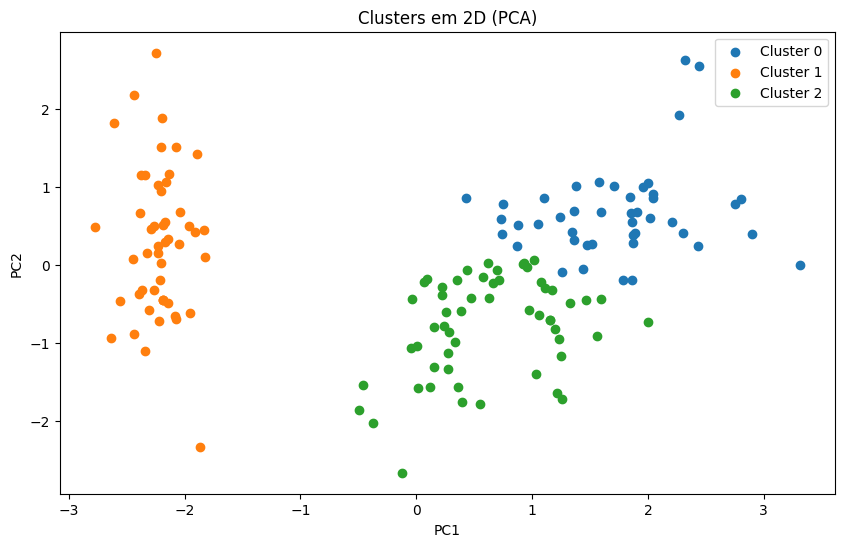

In [45]:
# Plota os clusters em 2D
plt.figure(figsize=(10, 6))
for cluster in np.unique(df_pca['group']):
    plt.scatter(
        df_pca[df_pca['group'] == cluster]['PC1'],
        df_pca[df_pca['group'] == cluster]['PC2'], 
        label=f'Cluster {cluster}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters em 2D (PCA)')
plt.legend()
plt.show()

In [54]:
# O PCA é aplicado ao conjunto de dados para reduzir suas dimensões para 3 componentes, para plotagem do gráfico 3D.
pca_3d = PCA(n_components=3)
pca_3d_array = pca_3d.fit_transform(dataset)

# Cria um DataFrame com os componentes principais
pca_df_3d = pd.DataFrame(data=pca_3d_array, index=dataset.index.copy())
pca_df_3d.columns = ['PC' + str(i+1) for i in range(pca_df_3d.shape[1])]
pca_df_3d['group'] = group
pca_df_3d.head()

,PC1,PC2,PC3,group
0,-2.264542,0.505704,-0.121943,1
1,-2.086426,-0.655405,-0.227251,1
2,-2.367950,-0.318477,0.051480,1
3,-2.304197,-0.575368,0.098860,1
4,-2.388777,0.674767,0.021428,1


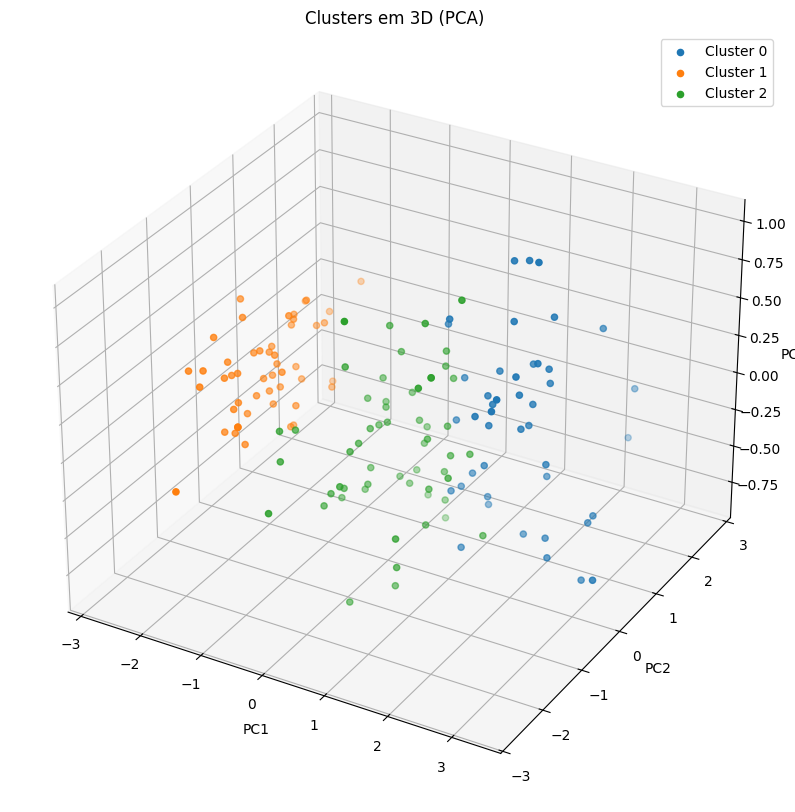

In [55]:
# Plota os clusters em 3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

for cluster in np.unique(pca_df_3d['group']):
    ax.scatter(
        pca_df_3d[pca_df_3d['group'] == cluster]['PC1'],
        pca_df_3d[pca_df_3d['group'] == cluster]['PC2'],
        pca_df_3d[pca_df_3d['group'] == cluster]['PC3'],
        label=f'Cluster {cluster}'
    )

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Clusters em 3D (PCA)')
ax.legend()
plt.show()